# Stroke Healthcare Prediction Model

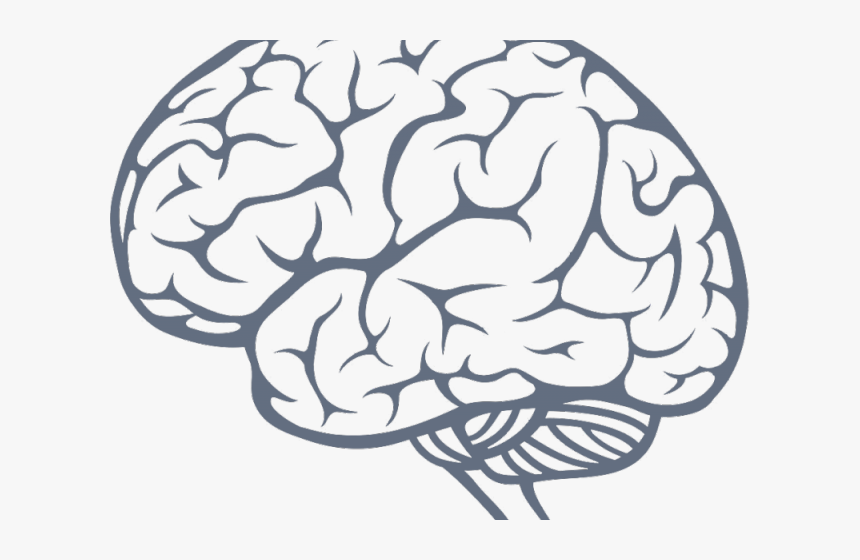





According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

    1) id: unique identifier
    2) gender: "Male", "Female" or "Other"
    3) age: age of the patient
    4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    6) ever_married: "No" or "Yes"
    7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    8) Residence_type: "Rural" or "Urban"
    9) avg_glucose_level: average glucose level in blood
    10) bmi: body mass index
    11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    12) stroke: 1 if the patient had a stroke or 0 if not
**Note**: "Unknown" in smoking_status means that the information is unavailable for this patient

Here dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [228]:
# Importing Tools
# Preprocessing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modelling and evaluating
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [229]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [231]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [232]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [233]:
df.shape

(5110, 12)

In [234]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only `bmi` column has missing value

In [235]:
df.duplicated().sum()

0

We have not duplicated rows

Unique values of categorical datas

In [236]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [237]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [238]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [239]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [240]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [241]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [242]:
# Firstly handling the missing value in bmi
# we use to median value
df['bmi'].median()

28.1

In [243]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)
# Filling missing value median value

In [244]:
df['bmi'].isna().sum()

0

We have only one 'other' gender. We can drop it.

In [245]:
df.index[df['gender']=='Other']


Int64Index([3116], dtype='int64')

In [246]:
df.drop(index=3116, axis=0, inplace=True)


In [247]:
df.shape
# Before frop it, we have 5110 rows. We dropped the inconsistent value.

(5109, 12)

In [248]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Visualization and EDA

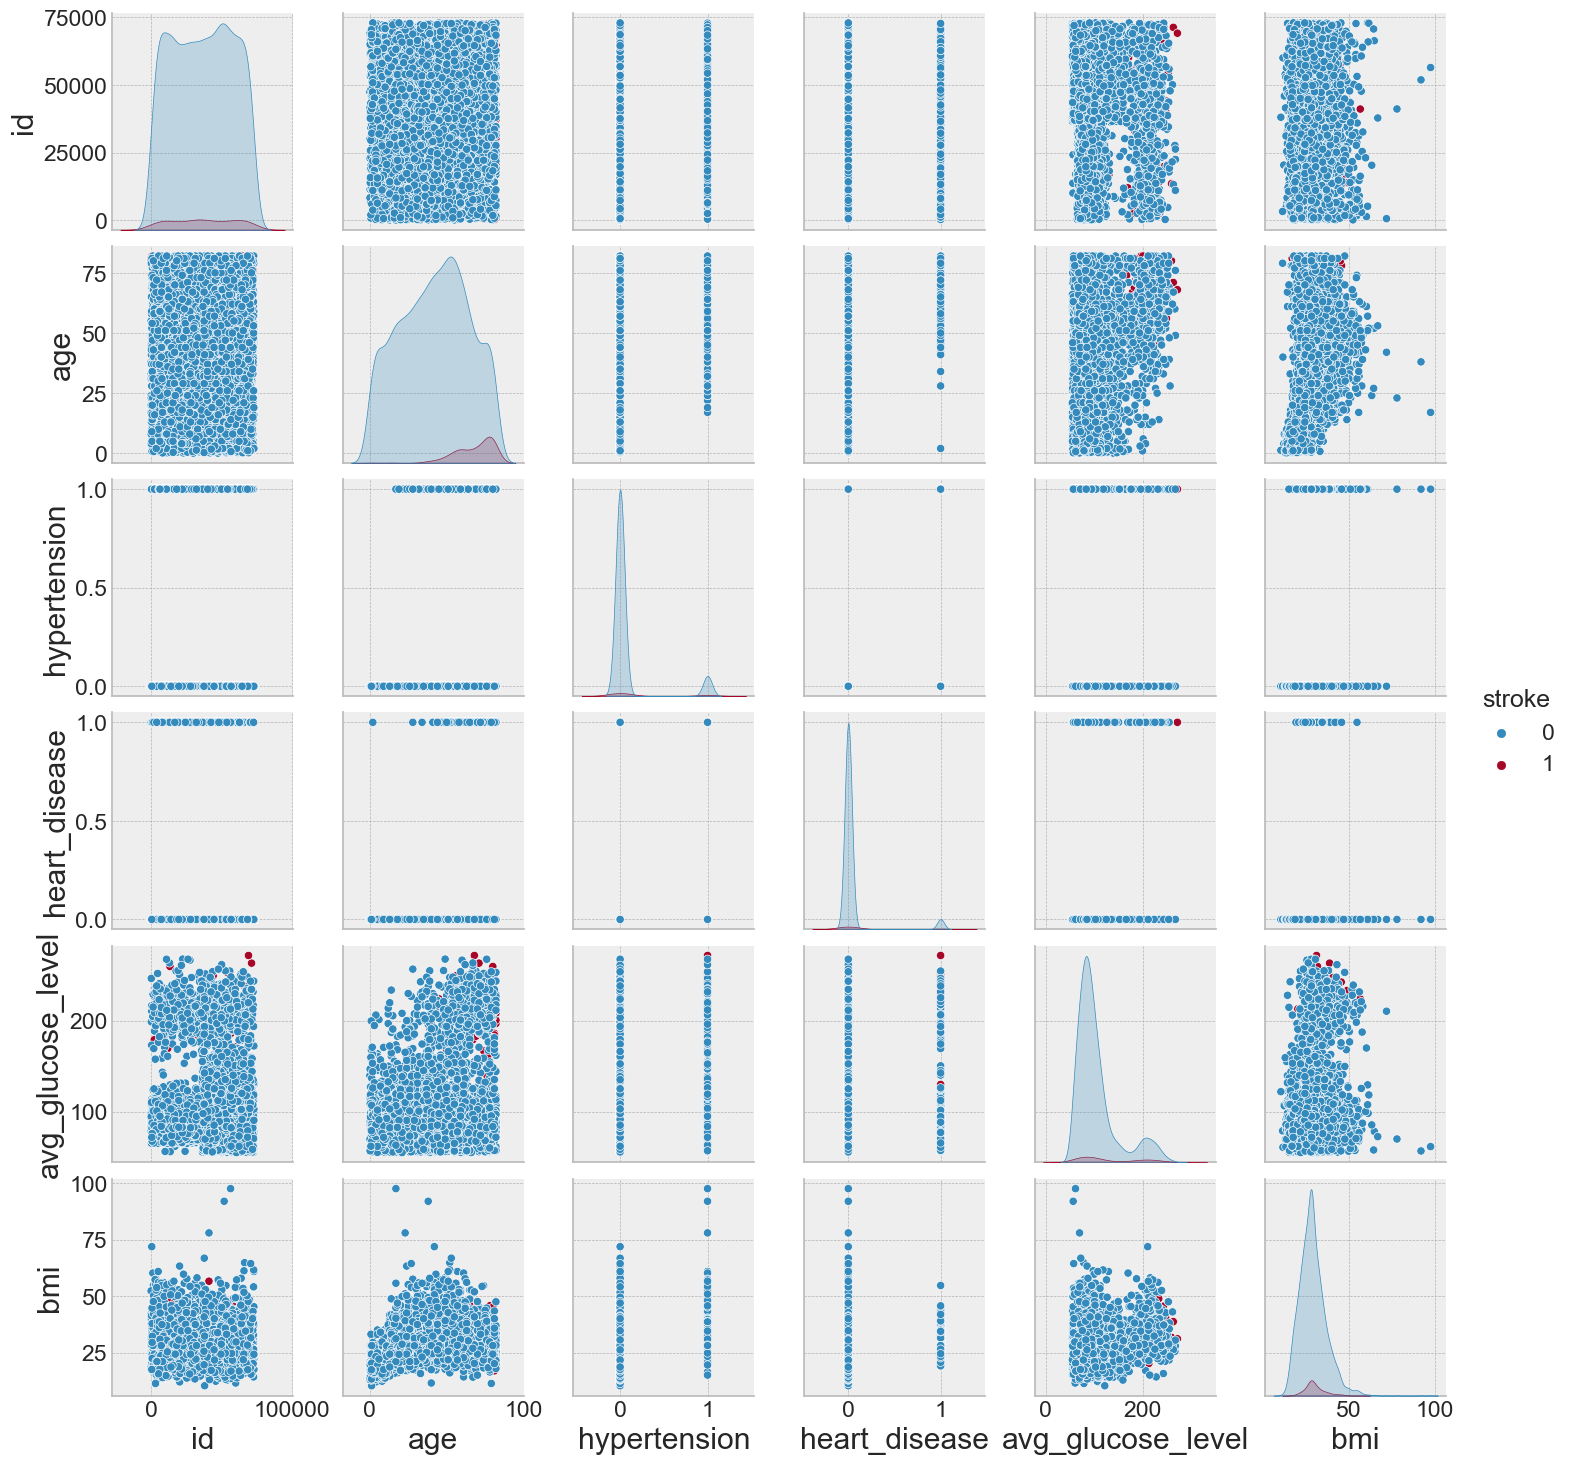

In [249]:
sns.pairplot(data=df, hue='stroke');

0    4860
1     249
Name: stroke, dtype: int64

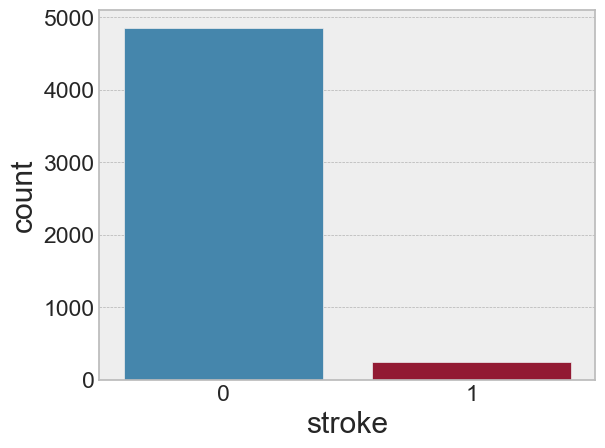

In [250]:
plt.style.use('bmh')
sns.countplot(data=df, x='stroke');
df.stroke.value_counts()

Our datas are mostly 0 value for stroke(target)

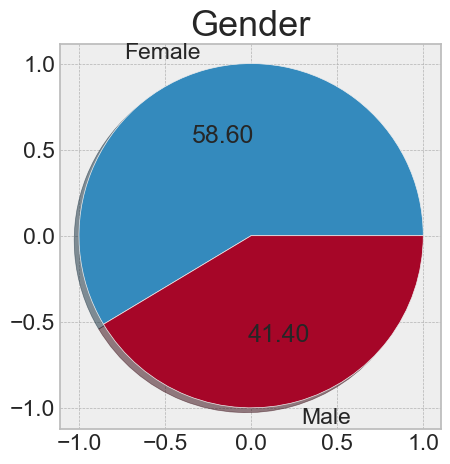

In [251]:
plt.figure(figsize=(5,5))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index,autopct='%.2f', shadow=True, frame=True )
plt.title('Gender')
plt.show();

Female    2994
Male      2115
Name: gender, dtype: int64

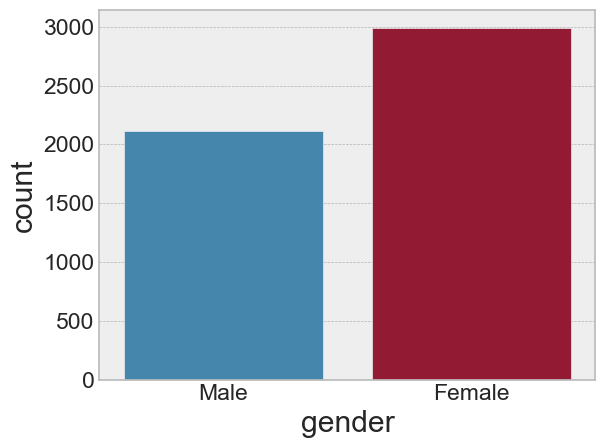

In [252]:
sns.countplot(data=df, x='gender');
df.gender.value_counts()

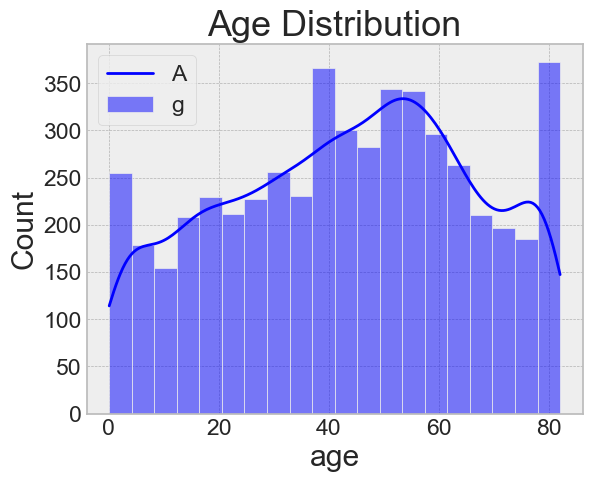

In [253]:
# Age distribution
fig = plt.figure()
ax = sns.histplot(data = df, x='age', kde=True)
ax.set_title("Age Distribution")
ax.legend("Age")
fig.add_subplot(ax);

We have an age distribution graph contrary to the normal distribution


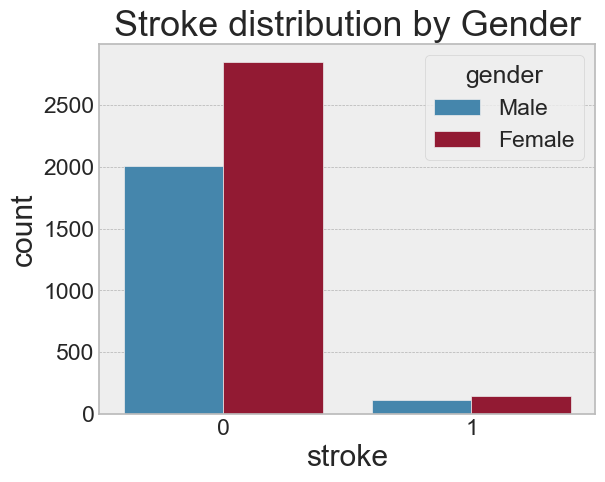

In [254]:
ax = sns.countplot(data=df, x='stroke', hue='gender')
ax.set_title('Stroke distribution by Gender');

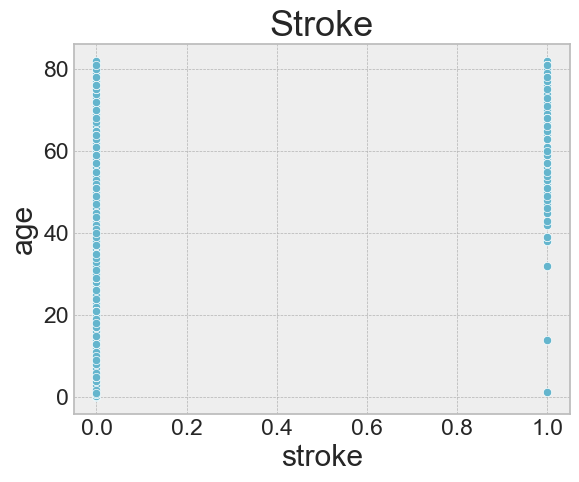

In [255]:
ax = sns.scatterplot(data=df, x='stroke', y='age', color='c')
ax.set_title('Stroke');

As you can see, our young age values are lower in our target value.

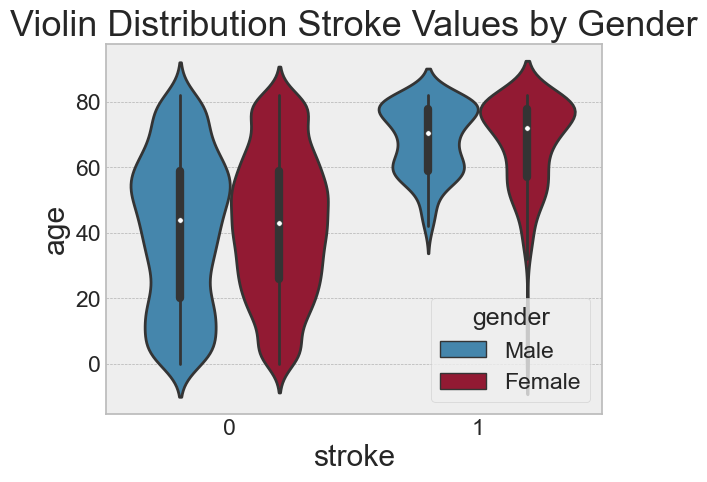

In [256]:
ax = sns.violinplot(data=df,x='stroke', y='age', hue='gender')
ax.set_title('Violin Distribution Stroke Values by Gender');

As shown as violinplot, stroke rate increases with age

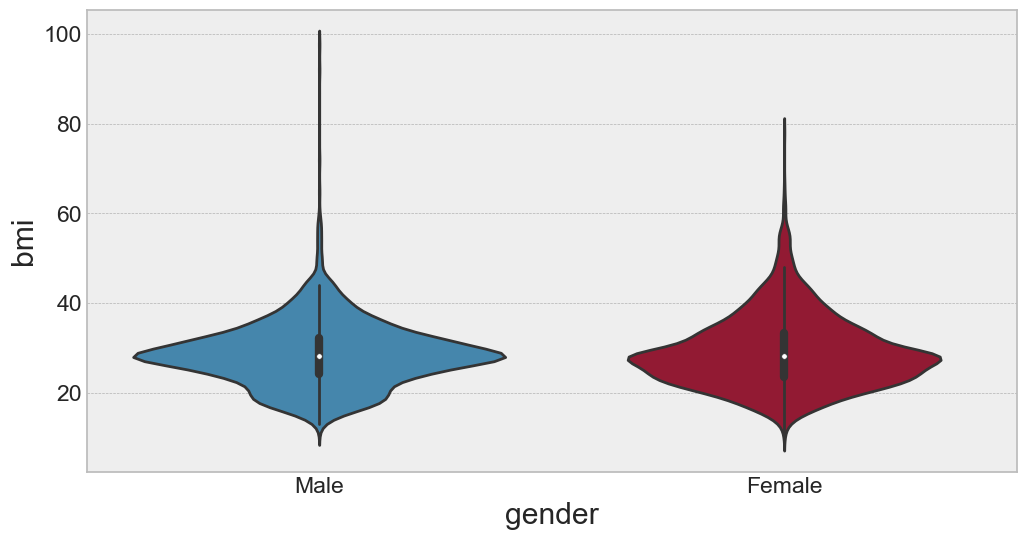

In [257]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df,x='gender', y='bmi');

bmi values mostly between 20 and 40.

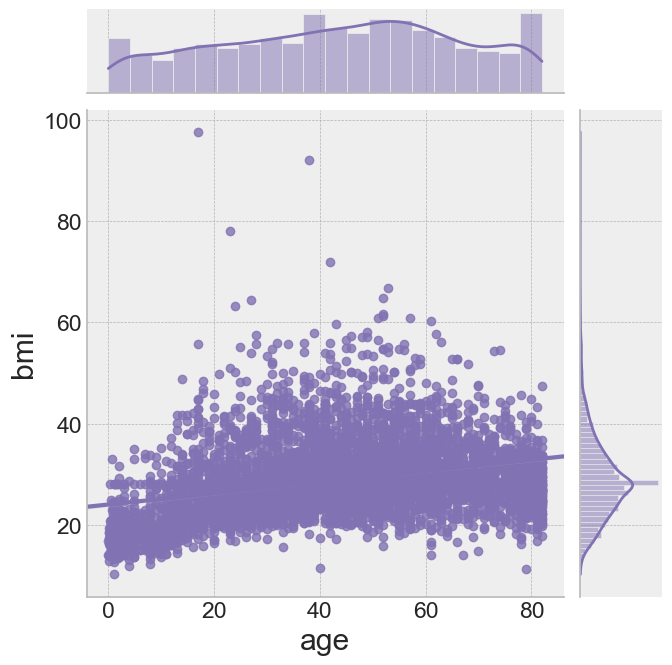

In [258]:
sns.jointplot(x='age', y='bmi', data=df,
                  kind='reg', truncate=False,
                  color='m', height=7);

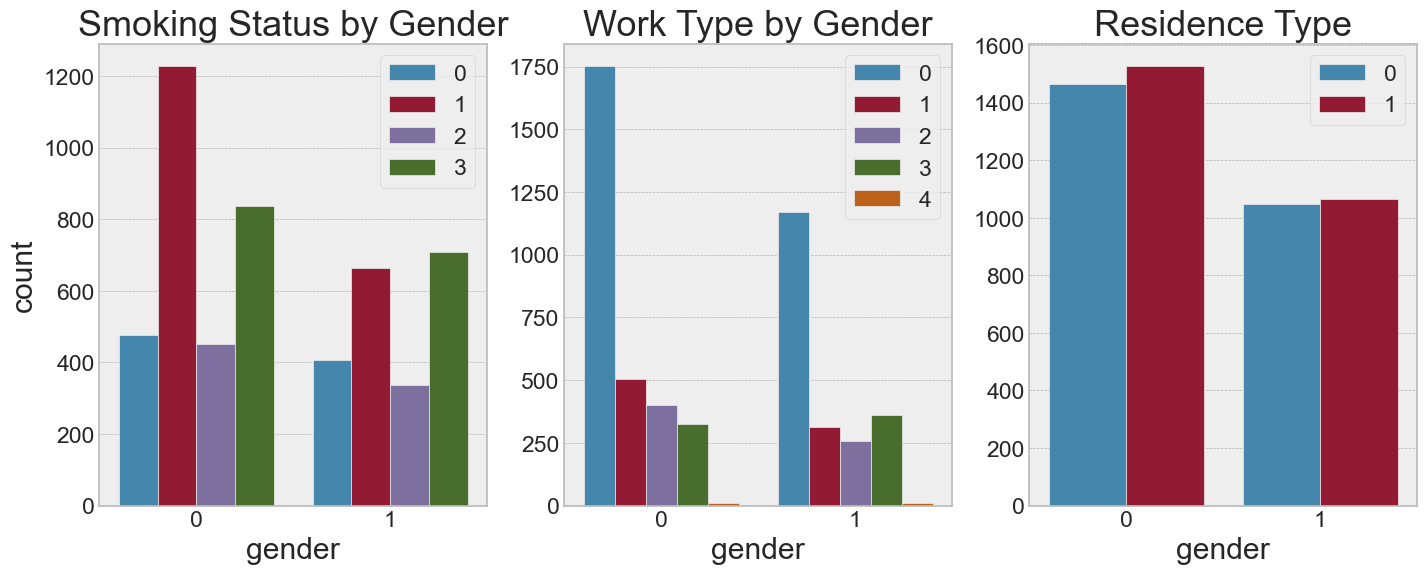

In [297]:
plt.figure(figsize=(17,6))

plt.subplot(1,3,1)
plt.title('Smoking Status by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
sns.countplot(x=df['gender'],hue='smoking_status',data=df);
plt.legend()

plt.subplot(1,3,2)
plt.title('Work Type by Gender')
plt.xlabel('Gender')
g1=sns.countplot(x=df['gender'],hue='work_type',data=df);
g1.set(ylabel=None)
plt.legend()

plt.subplot(1,3,3)
plt.title('Residence Type')
plt.xlabel('Gender')
g1=sns.countplot(x=df['gender'],hue='Residence_type',data=df);
plt.legend()
g1.set(ylabel=None)

plt.show()

* Many female people never smoked, at the same time, unkown situation for many people
* For both gender, many people are working on private sector
* At Residence Type column, interestingly same amount of men and women living both urban and rural side.

<AxesSubplot:xlabel='hypertension', ylabel='age'>

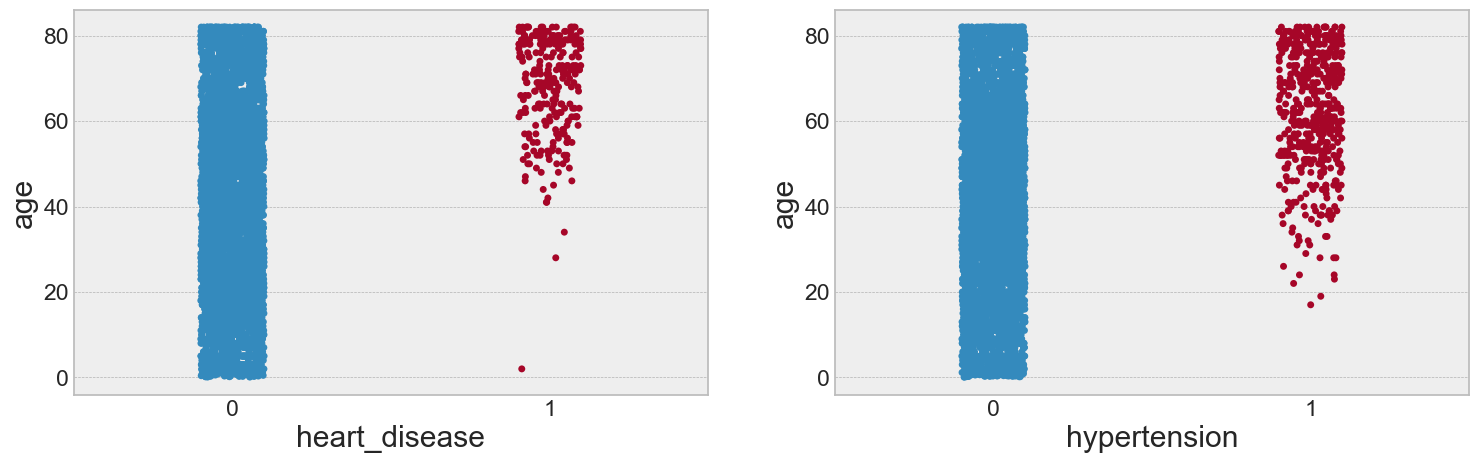

In [260]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2,1)
sns.stripplot(data=df,x='heart_disease',y='age')
plt.subplot(1, 2,2)
sns.stripplot(data=df,x='hypertension',y='age')

* Hypertesion disease risk increase in people of above 50.
* Heart disease risk increase in people of above 50.

#### We need to handling categorical values

In [261]:
print(pd.unique(df['gender']))
print(pd.unique(df['smoking_status']))
print(pd.unique(df['ever_married']))
print(pd.unique(df['work_type']))
print(pd.unique(df['Residence_type']))

['Male' 'Female']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']


In [262]:
# Transform numeric values for gender 
df['gender'] = df['gender'].map({'Male':1, 'Female':0})
df['gender']

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5109, dtype: int64

In [263]:
# Transform numeric values for smoking_status 
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df['smoking_status']

0       0
1       1
2       1
3       2
4       1
       ..
5105    1
5106    1
5107    1
5108    0
5109    3
Name: smoking_status, Length: 5109, dtype: int64

In [264]:
# Transform numeric values for ever_married 
df['ever_married'] = df['ever_married'].map({'Yes':1, 'No':0})
df['ever_married']

0       1
1       1
2       1
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 5109, dtype: int64

In [265]:
# Transform numeric values for work_type 
df['work_type'] = df['work_type'].map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4})
df['work_type']

0       0
1       1
2       0
3       0
4       1
       ..
5105    0
5106    1
5107    1
5108    0
5109    2
Name: work_type, Length: 5109, dtype: int64

In [266]:
# Transform numeric values for Residence_type 
df['Residence_type'] = df['Residence_type'].map({'Urban':1, 'Rural':0})
df['Residence_type']

0       1
1       0
2       0
3       1
4       0
       ..
5105    1
5106    1
5107    0
5108    0
5109    1
Name: Residence_type, Length: 5109, dtype: int64

Now, All dataset transformed numeric values and ready to split for fitting model. 

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int64  
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 647.9 KB


In [268]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,1,228.69,36.6,0,1
1,51676,0,61.0,0,0,1,1,0,202.21,28.1,1,1
2,31112,1,80.0,0,1,1,0,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.0,1,1


In [269]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,0,80.0,1,0,1,0,1,83.75,28.1,1,0
5106,44873,0,81.0,0,0,1,1,1,125.20,40.0,1,0
5107,19723,0,35.0,0,0,1,1,0,82.99,30.6,1,0
5108,37544,1,51.0,0,0,1,0,0,166.29,25.6,0,0
5109,44679,0,44.0,0,0,1,2,1,85.28,26.2,3,0


A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. Now we created a correlation matrix with Seaborn.

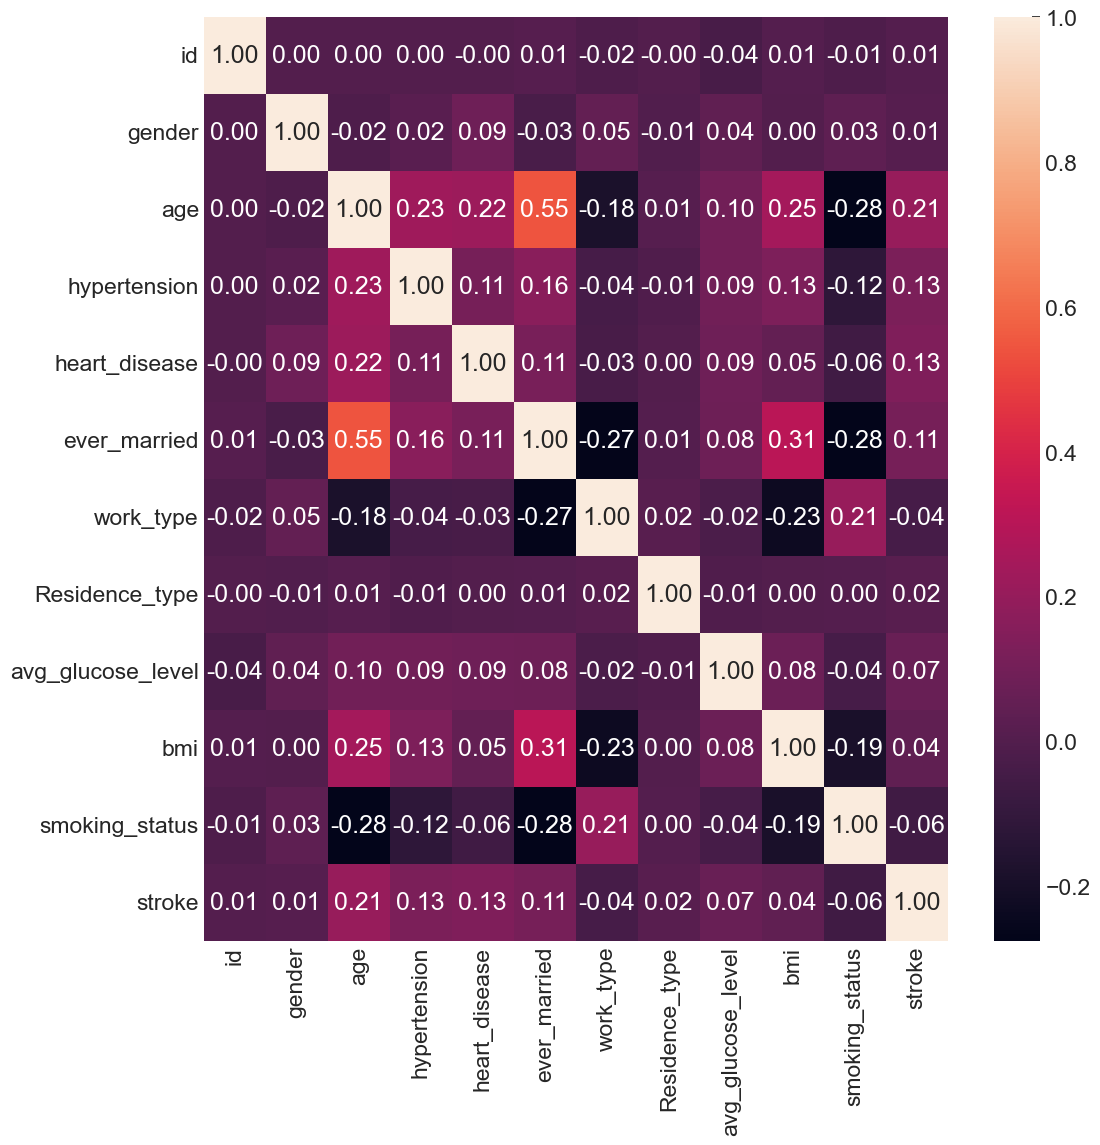

In [296]:
correlation = df.corr(method='kendall')
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation, annot=True, fmt='.2f')

The problem is supervised and classification problem. We can check sklearn ML module map and choosing the which have high score module.

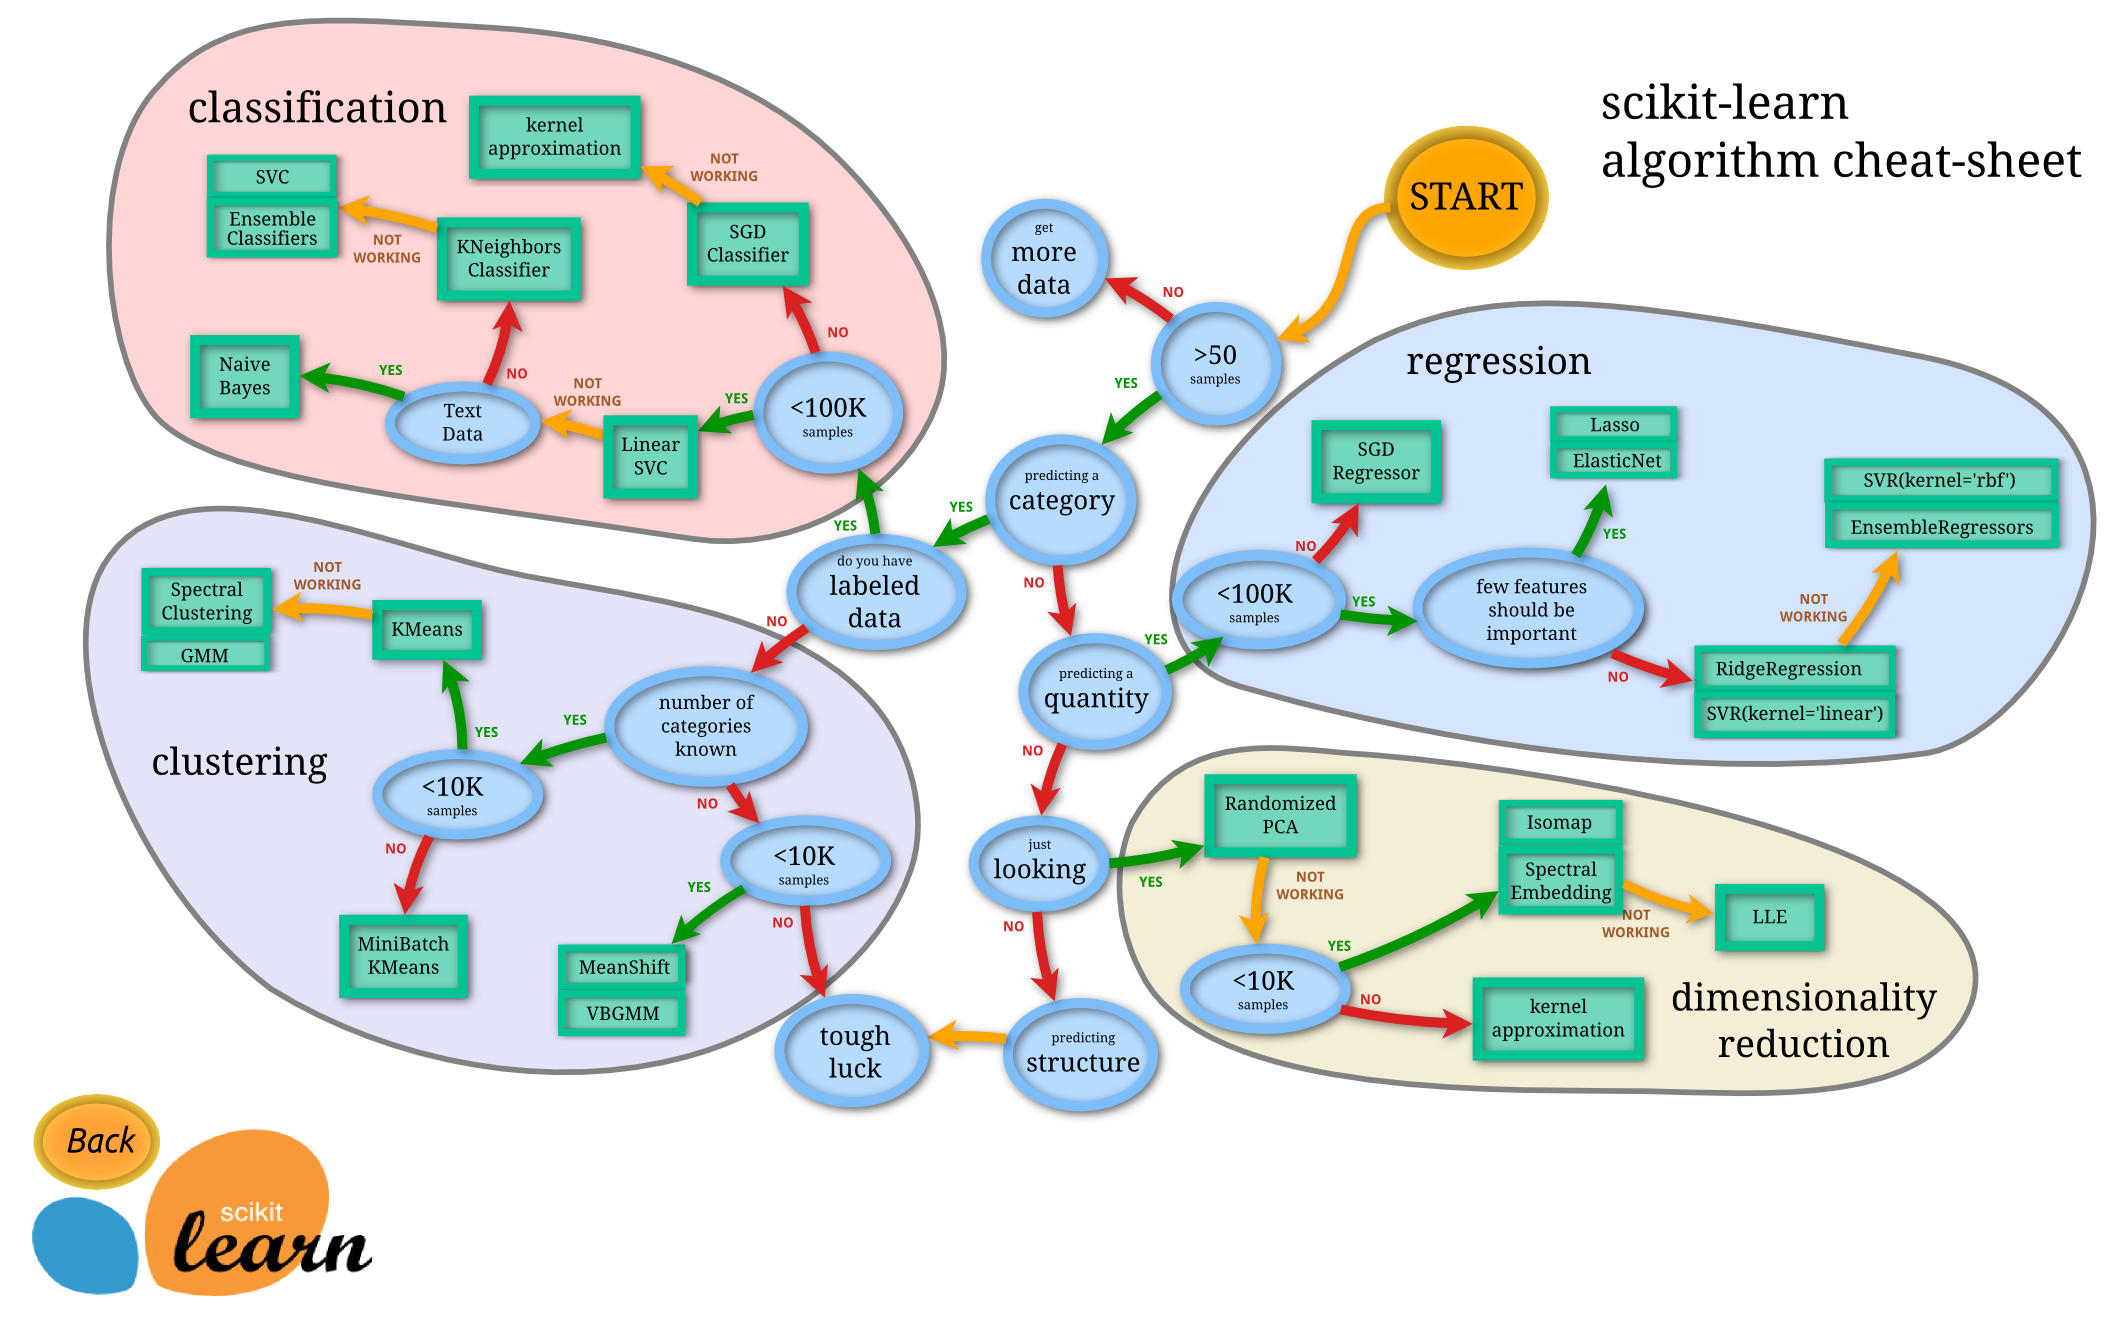

* There are more than 50 samples.
* Predicting a category.
* We have labeled data.
* There are less than 100k samples.
* We have not text data.
* We can try to 'LinearSVC', 'KNeighbors Classifier' and 'RandomForestClassifier'

In [271]:
# Firstly split data x & y
x = df.drop(['stroke'], axis=1)
y = df['stroke']
x.shape, y.shape

((5109, 11), (5109,))

In [272]:
# Split data into train and test

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state=30,
                                                    test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4087, 11), (1022, 11), (4087,), (1022,))

In [274]:
# Fitting the model
models = {'LinearSVC': LinearSVC(dual=False),
          'KNeighbors_Classifier': KNeighborsClassifier(n_jobs=-1),
          'Random_Forest_Classifier': RandomForestClassifier()}

def fit_and_score(model, x_train, x_test, y_train, y_test):
    '''
    This function will fitting data and model and 
    calculate the test score.
    '''
    # Set random seed (like random state, same function)
    np.random.seed(42)
    # Keep dictionaries model scores (train and test)
    model_train_scores = {}
    model_scores ={}   
    # Fitting the model
    for name, model in models.items():
        model.fit(x_train, y_train)
        # Training score
        model_train_scores[name] = model.score(x_train, y_train) * 100        
        # Evaluate the model and append its score to model_scores (for test)
        model_scores[name] = model.score(x_test, y_test) * 100
    return 'Test scores', model_scores, 'Training scores' ,model_train_scores

In [275]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [276]:
model_scores = fit_and_score(model=models,
                             x_train = x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

('Test scores',
 {'LinearSVC': 96.4774951076321,
  'KNeighbors_Classifier': 96.28180039138942,
  'Random_Forest_Classifier': 96.37964774951077},
 'Training scores',
 {'LinearSVC': 94.7638854905799,
  'KNeighbors_Classifier': 94.86175678982138,
  'Random_Forest_Classifier': 99.97553217518963})

Model with the highest training score is Random Forest Classifier. We continue to project with Random Forest Classifier.

**NOTE:** There is a seems overfitting, there is not actually. The reason for high scores is that the target (stroke) values **are disproportionate in the data set.**

Now, we can fitting again RandomForestClassifier module and tuning hyperparameters and evaluating metric scores.
* Accuracy
* F1_score
* Precision
* ROC Curve

In [277]:
# Using GridSearchCV tuning the hyperparameters
# State the random seed
np.random.seed(42)
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ["auto"],
    'min_samples_leaf': [1,3],
    'min_samples_split': [2, 12],
    'n_estimators': [100,200, 1000],
    'max_samples':[None]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = None, n_jobs = None)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['auto'], 'max_samples': [None],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 12],
                         'n_estimators': [100, 200, 1000]})

In [278]:
grid_search.score(x_test,y_test)

0.9647749510763209

In [279]:
# Reach the best params
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 100}

In [280]:
# Fitting the model with best hyperparameter
np.random.seed(42)
model = RandomForestClassifier(bootstrap=True,
     max_depth=None,
     max_features= 'auto',
     max_samples=None,
     min_samples_leaf= 1,
     min_samples_split=12,
     n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9647749510763209

After the tuning hyperparameters, model score increased to 0.9647749510763209.

In [282]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

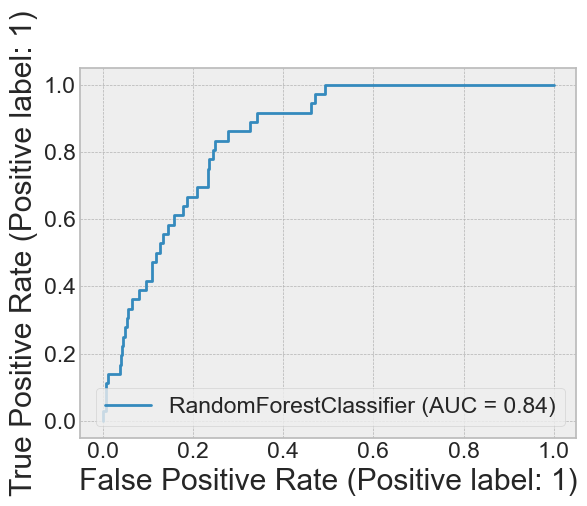

In [283]:
plot_roc_curve(model, x_test, y_test)

In [284]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[986,   0],
       [ 36,   0]], dtype=int64)

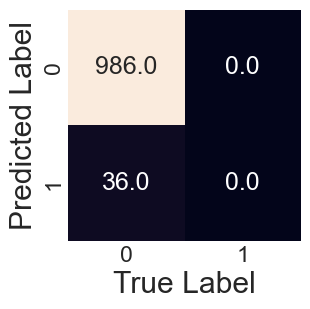

In [285]:
# Visualization confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    For confusion matrix visualization using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     fmt='.1f',
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_mat(y_test, y_pred)

Model errors usually occur in 1 predictions. 


We have got ROC Curve and AUC metric, confusion matrix. Now, get a classification report as well as cross-validated, precision, recall and f1-score.

In [286]:
# Create a new classifier with best parameters

clf = RandomForestClassifier(bootstrap=True,
     max_depth=None,
     max_features= 'auto',
     max_samples=None,
     min_samples_leaf= 1,
     min_samples_split=12,
     n_estimators=100)

In [287]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "accuracy")
cv_acc

array([0.95107632, 0.95107632, 0.9481409 , 0.95107632, 0.9510284 ])

In [288]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9504796533079307

cross-validated decrease our score.

Looking other metrics.

Precision is a measure of how many of the positive predictions made are correct (true positives).

In [289]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data

In [290]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.0

F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two.

In [291]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.0

Confusion matrix shows us when predicted label is 1 and True label is 1, our value is 0.

None of the values model predicted 1 are 1.


In [292]:
model.score(x_test, y_test)

0.9647749510763209

In [293]:
accuracy_score(y_test, y_pred)


0.9647749510763209

**NOTE:**Accuracy score and `model_score` are same things.

Finally, with best parameter model score: 0.9647749510763209 